In [1]:
import pandas as pd
import numpy as np

In [2]:
bookings = pd.read_csv('bookings.csv', sep=';')

In [3]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11111 entries, 0 to 11110
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   booking_key   11111 non-null  int64  
 1   created_utc   11111 non-null  object 
 2   business_key  11111 non-null  int64  
 3   user_key      11111 non-null  int64  
 4   service_key   11103 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 434.1+ KB


In [4]:
bookings.head()

,booking_key,created_utc,business_key,user_key,service_key
0,7256985,'2020-02-22 11:06:12.181',9301378,657833,23173.0
1,1772648,'2018-07-10 00:06:59.499',7655175,325554,34528.0
2,1775113,'2018-07-10 12:31:30.701',7655175,301612,34542.0
3,5750161,'2019-09-10 12:08:08.505',8646955,218662,34528.0
4,7260428,'2020-02-22 16:56:02.187',9330496,392986,34529.0


In [5]:
type(bookings['created_utc'][0])

str

In [6]:
bookings['created_utc'] = bookings['created_utc'].apply(lambda x: x.strip("''"))

In [7]:
bookings['created_utc'] 

0        2020-02-22 11:06:12.181
1        2018-07-10 00:06:59.499
2        2018-07-10 12:31:30.701
3        2019-09-10 12:08:08.505
4        2020-02-22 16:56:02.187
                  ...           
11106    2020-01-23 13:47:32.928
11107    2020-10-18 13:54:30.107
11108    2019-02-24 12:35:36.659
11109    2019-03-07 08:58:23.409
11110    2019-03-08 11:54:40.919
Name: created_utc, Length: 11111, dtype: object

Ile bookingów robi przeciętny użytkownik?
Jak starzy są użytkownicy?
Do ilu biznesów chodzą Ci użytkownicy?

In [8]:
business = pd.read_csv('business.csv', sep=',')

In [9]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11111 entries, 0 to 11110
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   business_key    11111 non-null  int64 
 1   business_id     11111 non-null  int64 
 2   status          11111 non-null  object
 3   effective_from  11111 non-null  object
 4   effective_till  8715 non-null   object
 5   city            10889 non-null  object
dtypes: int64(2), object(4)
memory usage: 521.0+ KB


In [10]:
business.head()

,business_key,business_id,status,effective_from,effective_till,city
0,9823899,4275,S,'2020-11-06 23:40:33.634',NaN,Warsaw
1,9794094,4213,F,'2020-10-14 17:08:16.517',NaN,Warsaw
2,9794677,4214,F,'2020-10-15 00:59:49.050',NaN,Chicago
3,9791562,4229,T,'2020-10-13 01:01:32.237','2020-10-14 17:46:58.879',Chicago
4,9793985,4239,S,'2020-10-14 15:14:37.281',NaN,Cracow


In [11]:
import seaborn as sns

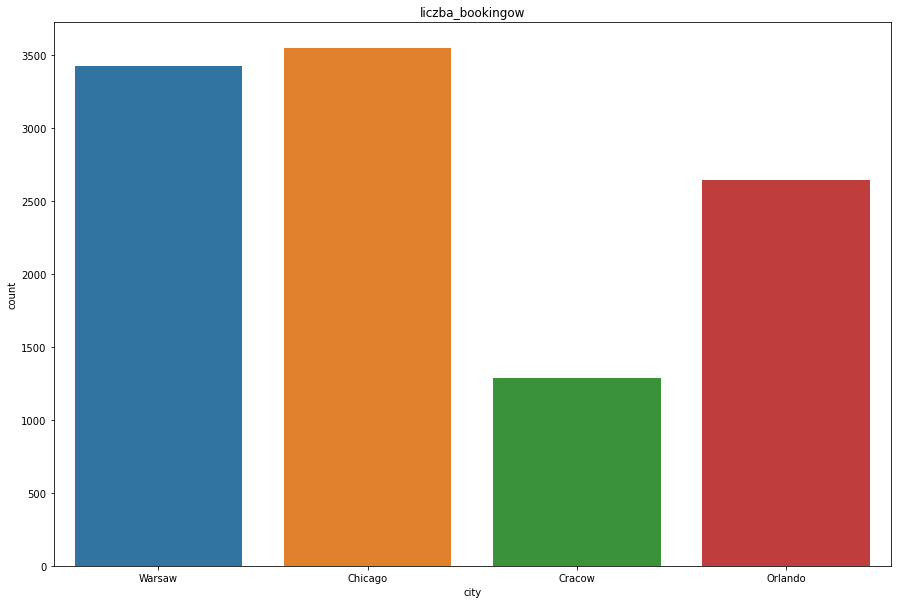

In [144]:
ax = sns.countplot(x="city", data=business).set(title='liczba_bookingow')

Najwięcej bookingów zawieranych jest w Warszawie i Chicago.

In [13]:
business.groupby('business_id').count()['business_key'].describe()

count    3303.000000
mean        3.363912
std         3.182734
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        41.000000
Name: business_key, dtype: float64

Mamy 3303 unikalne biznesy. Z czego każdy otrzymuje przeciętnie 3 bookingi. Najabardziej popularny biznes otrzymał 41 bookingów.

In [14]:
bookings_metryczka = bookings[['booking_key', 'user_key', 'service_key']]

In [15]:
bookings['effective_from'] = bookings['created_utc'].apply(lambda x: x.strip("''"))

In [16]:
bookings.groupby('user_key').count()['booking_key'].describe()

count    6706.000000
mean        1.656874
std         1.414396
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        20.000000
Name: booking_key, dtype: float64

W sumie zrobiono 6 7006 bookingów, połowa userów robi conajmniej jeden booking w aplikacji booksy. 75% userów robi dwa lub mniej bookingów. Największa ilość bookingów zrobiona przez jednego usera to 20 bookingów.  

In [17]:
user_bookings = bookings.groupby('user_key').count()['booking_key']; 

In [18]:
bookings_number = user_bookings.value_counts()
bookings_precent = bookings_number/len(bookings)
bookings_precent

1     0.405184
2     0.115111
3     0.038970
4     0.020160
5     0.010170
6     0.004590
7     0.002700
8     0.001710
11    0.001350
9     0.001080
10    0.000990
12    0.000540
13    0.000270
14    0.000270
15    0.000090
17    0.000090
20    0.000090
16    0.000090
19    0.000090
Name: booking_key, dtype: float64

40% aktywnych użytkowników robi jeden booking, 11% aktywnych użytkowników robi 2 bookingi 3% aktywnych użytkowników robi 2% bookingów lub więcej. Ogólny wniosek jest taki, że większość użytkowników używa aplikacji raz lub dwa razy. Jest mało użytkowników, którzy robią bookingi regularnie. Marketing powinnien zachęcić użytkowników do bardziej regularnego korzystania z aplikacji na przykład przez zniżki na kolejną rezerwacje albo jakiegoś rodzaju notyfikacje. 

Zadanicze pytanie to co różnicuje aktywnego użytkownika od mało aktywnego użytkownika aplikacji?

In [19]:
import matplotlib.pyplot as plt

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

W jakim mieście biznesy generują najwięcej bookingów?
Czy długość biznesu ma wpływ na booking?

In [21]:
user = pd.read_csv('user.csv')

In [22]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11111 entries, 0 to 11110
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_key  11111 non-null  int64 
 1   created   11111 non-null  object
 2   gender    8292 non-null   object
dtypes: int64(1), object(2)
memory usage: 260.5+ KB


In [23]:
user.head()

,user_key,created,gender
0,2134,'2016-09-22 11:19:29.479',M
1,735262,'2020-01-30 21:35:34.967',B
2,761966,'2020-03-13 14:19:14.286',F
3,817415,'2020-06-23 11:32:18.009',F
4,821306,'2020-06-23 18:39:45.547',NaN


In [24]:
user['created'] = user['created'].apply(lambda x: x.strip("''"))

In [25]:
user['created'] = user['created'].astype('datetime64[ns]')

In [26]:
from datetime import date

today = date.today()
user['today'] = max(user['created'])
user['today'] = user['today'].astype('datetime64[ns]')

In [27]:
user['created'] = pd.to_datetime(user['created'])

In [28]:
user['created_d'] = user['created'].dt.to_period('D')
user['today_d'] = user['today'].dt.to_period('D')

In [29]:
user['created_month'] = user['created'].dt.month
user['created_day'] = user['created'].dt.weekday

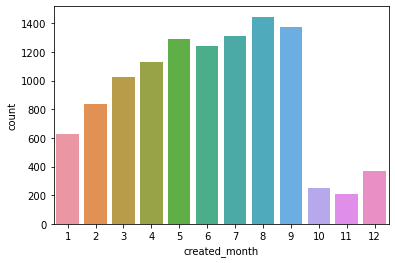

In [30]:
import seaborn as sns
ax = sns.countplot(x="created_month", data=user) 

Mniej kont zakładanych jest w miesiącach zimowo-jesiennych (październik, listopad, grudzień, styczeń).

In [31]:
user['created_year'] = user['created'].dt.year

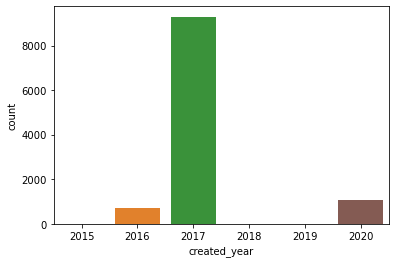

In [32]:
ax = sns.countplot(x="created_year", data=user) 

Większość danych pochodzi z roku 2016 i z roku 2017 oraz niewielka część z roku 2020, więc dane jako próbka mająca odzwierciedlać populacje nie jest wybrana w sposób losowy i jej nie odzwierciedla, ale to rozumiem na potrzeby rekrutacji :)

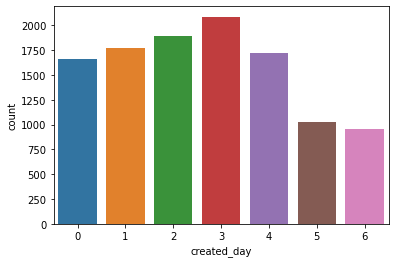

In [33]:
ax = sns.countplot(x="created_day", data=user) 

Najmniej nowych użytkowników rejestruje się w soboty i niedziele. 

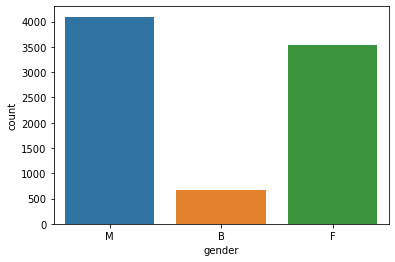

In [34]:
ax = sns.countplot(x="gender", data=user) 

Liczba osób indetyfikujących się jako kobiety i mężczyźni jest podobna, jednak większość użytkowników aplikacji to mężczyźni, co jest zaskakujące.  

In [35]:
user['created_m'] = user['created'].dt.to_period('M')
user['today_m'] = user['today'].dt.to_period('M')

In [36]:
min(user['created_d'])

Period('2015-02-08', 'D')

Najstarszy użytkownik aplikacji zarejestrował się 8 lutego 2015 roku. Natomiast najmłodszy użytkownik aplikacji zarejestował się 8 listopada 2020 roku. 

In [37]:
max(user['created_d'])

Period('2020-11-08', 'D')

Jak starzy są nasi użytkownicy?

In [38]:
user['old_m'] = user['today_m'].astype(int) - user['created_m'].astype(int)

In [39]:
user['old_y'] = (user['old_m']/12).round()

In [40]:
user['old_m'].describe()

count    11111.000000
mean        38.298803
std         12.082219
min          0.000000
25%         39.000000
50%         42.000000
75%         44.000000
max         69.000000
Name: old_m, dtype: float64

In [41]:
user['old_y'].describe()

count    11111.000000
mean         3.212582
std          1.156513
min          0.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          6.000000
Name: old_y, dtype: float64

Przeciętny użytkownik posiada konto około 3 lat. 25% użytkowników posiada konto mniej niż 3 lata, 50% użytkowników posiada konto 4 lata lub mniej a 75% użytkowników posiada konto od 6 lat lub mniej. 

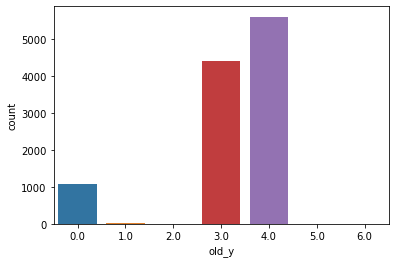

In [42]:
ax = sns.countplot(x="old_y", data=user)

Najwięcej użytkowników posiada konto 3 lub 4 lata. W aplikacji przeważają starzy użytkownicy. Dane są jednak niereprezentacyjne bo nie posiadamy danych o nowych użytkownikach aplikacji. Jeśli jednak dane byłby prawdziwe marketing powinnien podjąć działania dotyczące zachęcenia nowych użytkowników do zakładania kont na booksy.

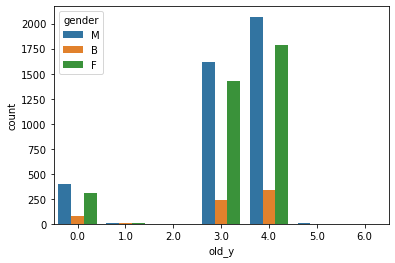

In [43]:
ax = sns.countplot(x="old_y", hue = "gender", data=user) 

Płeć nie ma wpływu na to jak długo użytkownik posiada konto na booksy. 

In [44]:
user.columns

Index(['user_key', 'created', 'gender', 'today', 'created_d', 'today_d',
       'created_month', 'created_day', 'created_year', 'created_m', 'today_m',
       'old_m', 'old_y'],
      dtype='object')

In [45]:
metryczka_user = user[['user_key', 'old_y', 'gender']]

In [46]:
service = pd.read_csv('service.csv', sep = ';')
service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11111 entries, 0 to 11110
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   service_key            11111 non-null  int64  
 1   service_variant_price  10453 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 173.7 KB


In [47]:
service.head()

,service_key,service_variant_price
0,99,299.0
1,125,99.0
2,340,15.0
3,341,15.0
4,342,15.0


In [48]:
bookings_metryczka = bookings_metryczka.merge(service, left_on='service_key', right_on='service_key', suffixes=(False, False))

In [49]:
bookings_metryczka


,booking_key,user_key,service_key,service_variant_price
0,7256985,657833,23173.0,10.0
1,739370,216634,23173.0,10.0
2,815079,216634,23173.0,10.0
3,6208229,657833,23173.0,10.0
4,1543175,170033,23173.0,10.0
...,...,...,...,...
6967,1607040,366681,38104.0,8.0
6968,7362341,736332,76037.0,40.0
6969,7022263,721969,34857.0,NaN
6970,7330584,732475,70740.0,15.0


In [50]:
bookings_metryczka['service_variant_price'].describe()

count    6463.000000
mean       18.111589
std        11.478597
min         1.000000
25%        13.000000
50%        15.000000
75%        20.000000
max       350.000000
Name: service_variant_price, dtype: float64

Średnia cena bookowanej usługi to 18 zł? Waluta nie jest podana (mimo różnych lokalizacji zakładam złotówki). Usługi zaczynają się od złotówki a najdroższa usługa kosztuje 350 zł. 50% usług kosztuje 15 zł lub mniej a 75% usług kosztuje 20 zł lub niej. Możemy po tym założyć, że grupą docelową klientów booksy jest klasa średnia lub biedniejsza, ponieważ usługi oferowane w aplikacji są na każdą kieszeń.

In [51]:
pd.cut(bookings_metryczka['service_variant_price'],[0,20,40,80,100,120,140,160,180,200,220,240]).value_counts()

(0, 20]       5117
(20, 40]      1220
(40, 80]       104
(80, 100]        7
(100, 120]       7
(140, 160]       4
(180, 200]       2
(220, 240]       1
(120, 140]       0
(160, 180]       0
(200, 220]       0
Name: service_variant_price, dtype: int64

Najwięcej bookingów robionych jest w cenach do 20 zł. Bookingi w cenach powyżej 80 zły są bardzo rzadkie. 

In [52]:
bookings_metryczka.head()

,booking_key,user_key,service_key,service_variant_price
0,7256985,657833,23173.0,10.0
1,739370,216634,23173.0,10.0
2,815079,216634,23173.0,10.0
3,6208229,657833,23173.0,10.0
4,1543175,170033,23173.0,10.0


In [53]:
metryczka_user.head()

,user_key,old_y,gender
0,2134,4.0,M
1,735262,1.0,B
2,761966,1.0,F
3,817415,0.0,F
4,821306,0.0,NaN


In [54]:
bookings_metryczka = bookings_metryczka.merge(metryczka_user, left_on='user_key', right_on='user_key', suffixes=(False, False))

In [55]:
bookings_metryczka

,booking_key,user_key,service_key,service_variant_price,old_y,gender
0,1543175,170033,23173.0,10.0,3.0,F
1,313856,170033,23173.0,10.0,3.0,F
2,584001,175833,23173.0,10.0,3.0,M
3,787401,200469,23173.0,10.0,3.0,F
4,787429,200469,23173.0,10.0,3.0,F
...,...,...,...,...,...,...
1409,2819134,53206,6057.0,13.0,4.0,M
1410,224437,80049,7053.0,15.0,4.0,NaN
1411,606320,205131,17733.0,10.0,3.0,NaN
1412,3554315,172388,70377.0,85.0,3.0,F


In [56]:
bookings_number = bookings_metryczka['user_key'].value_counts()
bookings_number = bookings_number.to_frame()
bookings_number = bookings_number.reset_index()

In [57]:
bookings_number

,index,user_key
0,89744,12
1,138600,11
2,86113,11
3,186066,11
4,91758,10
...,...,...
696,195522,1
697,195414,1
698,168775,1
699,49971,1


In [58]:
bookings_number = bookings_number.rename(columns = {"index":"user_key", "user_key":"liczba_bookingow"})

In [59]:
bookings_number.rename(columns = {})

,user_key,liczba_bookingow
0,89744,12
1,138600,11
2,86113,11
3,186066,11
4,91758,10
...,...,...
696,195522,1
697,195414,1
698,168775,1
699,49971,1


In [60]:
bookings_metryczka = bookings_metryczka.merge(bookings_number, left_on='user_key', right_on='user_key', suffixes=(False, False))

In [61]:
bookings_ml = bookings_metryczka[["user_key", "service_variant_price", "old_y", "gender", "liczba_bookingow"]]

In [62]:
bookings_ml = bookings_ml.dropna() #usuwamy braki danych

In [63]:
bookings_ml

,user_key,service_variant_price,old_y,gender,liczba_bookingow
0,170033,10.0,3.0,F,2
1,170033,10.0,3.0,F,2
2,175833,10.0,3.0,M,1
3,200469,10.0,3.0,F,3
4,200469,10.0,3.0,F,3
...,...,...,...,...,...
1407,139442,23.0,3.0,F,1
1408,146460,12.0,3.0,M,1
1409,53206,13.0,4.0,M,1
1412,172388,85.0,3.0,F,1


In [65]:
bookings_ml = bookings_ml[~bookings_ml.user_key.duplicated(keep='first')]

In [66]:
sex = {'M': 0,'F': 1, 'B': 3}

bookings_ml.gender = [sex[item] for item in bookings_ml.gender]


C:\Users\patry\Anaconda3\envs\ox\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [67]:
bookings_ml

,user_key,service_variant_price,old_y,gender,liczba_bookingow
0,170033,10.0,3.0,1,2
2,175833,10.0,3.0,0,1
3,200469,10.0,3.0,1,3
6,177073,10.0,3.0,3,1
14,50925,26.0,4.0,0,2
...,...,...,...,...,...
1407,139442,23.0,3.0,1,1
1408,146460,12.0,3.0,0,1
1409,53206,13.0,4.0,0,1
1412,172388,85.0,3.0,1,1


In [68]:
bookings_ml.liczba_bookingow.unique()

array([ 2,  1,  3,  5,  4,  9,  6,  8, 10, 11,  7], dtype=int64)

In [131]:

bookings_ml.loc[bookings_ml['liczba_bookingow'] <= 1, 'staly uzytkownik'] = 0 

In [132]:
bookings_ml

,user_key,service_variant_price,old_y,gender,liczba_bookingow,staly uzytkownik
0,170033,10.0,3.0,1,2,0.0
2,175833,10.0,3.0,0,1,0.0
3,200469,10.0,3.0,1,3,1.0
6,177073,10.0,3.0,3,1,0.0
14,50925,26.0,4.0,0,2,0.0
...,...,...,...,...,...,...
1407,139442,23.0,3.0,1,1,0.0
1408,146460,12.0,3.0,0,1,0.0
1409,53206,13.0,4.0,0,1,0.0
1412,172388,85.0,3.0,1,1,0.0


In [133]:
bookings_ml = bookings_ml.replace(np.NaN,1)

In [134]:
bookings_ml

,user_key,service_variant_price,old_y,gender,liczba_bookingow,staly uzytkownik
0,170033,10.0,3.0,1,2,0.0
2,175833,10.0,3.0,0,1,0.0
3,200469,10.0,3.0,1,3,1.0
6,177073,10.0,3.0,3,1,0.0
14,50925,26.0,4.0,0,2,0.0
...,...,...,...,...,...,...
1407,139442,23.0,3.0,1,1,0.0
1408,146460,12.0,3.0,0,1,0.0
1409,53206,13.0,4.0,0,1,0.0
1412,172388,85.0,3.0,1,1,0.0


In [135]:
bookings_ml.columns

Index(['user_key', 'service_variant_price', 'old_y', 'gender',
       'liczba_bookingow', 'staly uzytkownik'],
      dtype='object')

In [136]:
bookings_ml_2 = bookings_ml[['service_variant_price', 'old_y', 'gender', 'staly uzytkownik']]

In [137]:

X = bookings_ml[['service_variant_price', 'old_y', 'gender']]
y = bookings_ml['staly uzytkownik']

In [138]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [139]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [140]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train_std, y_train)
y_pred = classifier.predict(X_test_std)

In [141]:

classifier.score(X_test_std, y_test)

0.7

In [142]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[76 11]
 [22  1]]


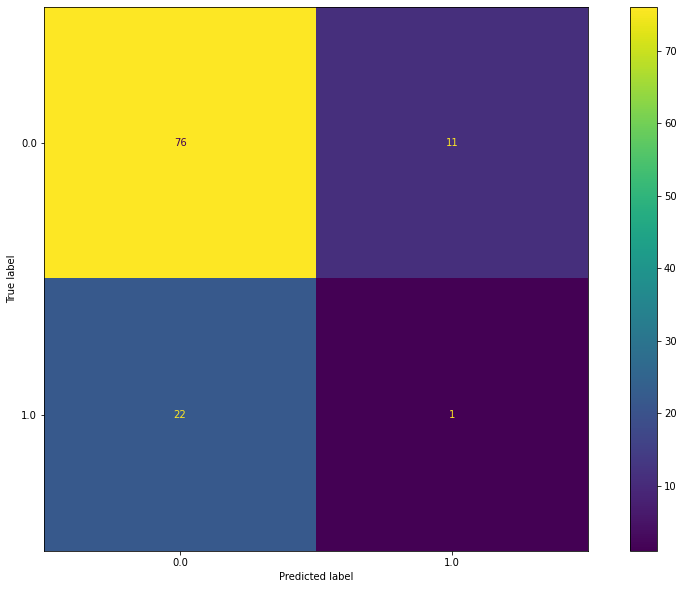

In [143]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test_std, y_test)

In [146]:
len(bookings['created_utc'][0])

23